In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

## Problem1

In [2]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD
    y_classes = np.unique(y) # get all the classes 
    means = np.empty(shape = (X.shape[1], y_classes.shape[0]))  # empty numpy matrix with size d x k
    
    for index, i in np.ndenumerate(y_classes):
        indices = np.where(y == i)[0]  # for each unique class, get their corresponding indices.
        X_class = np.take(X, indices, axis=0) # get the data rows corresponding to those indices.
        mean_class = np.mean(X_class, axis=0) # get the mean of the corresponding class data
        means[:, index[0]] = mean_class # mean for the corresponding class is added as a column to the means empty matrix.
    covmat = np.cov(X.T) #covariance matrix
    return means,covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    y_classes = np.unique(y) # get all the classes 
    means = np.empty(shape = (X.shape[1], y_classes.shape[0]))  # empty numpy matrix with size d x k
    covmats = [] #list of covariance matrices
    for index, i in np.ndenumerate(y_classes):
        indices = np.where(y == i)[0]  # for each unique class, get their corresponding indices.
        X_class = np.take(X, indices, axis=0) # get the data rows corresponding to those indices.
        mean_class = np.mean(X_class, axis=0) # get the mean of the corresponding class data
        means[:, index[0]] = mean_class # mean for the corresponding class is added as a column to the means empty matrix.
        covmats.append(np.cov(X_class.T)) #covariance matrix
    return means,covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    ypred = np.zeros(ytest.shape)
    coeff = 1 / sqrt(((2*pi) ** means.shape[0])*(det(covmat)))
    for i in range(Xtest.shape[0]):
        power_mat = np.dot(np.dot((Xtest[i] - means.T), inv(covmat)), (Xtest[i] - means.T).T)
        prob_mat = np.diagonal(coeff * (np.exp(-0.5 * power_mat)))
        ypred[i] = np.argmax(prob_mat) + 1
    
    acc = np.sum(ypred == ytest) / len(ytest)    
    return acc,ypred

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    coeffs = np.zeros(means.shape[1])
    for j in range(means.shape[1]):
        coeffs[j] = 1 / sqrt(((2*pi) ** means.shape[0])*(det(covmats[j])))
    
    prob_mat = np.zeros(means.shape[1])
    ypred = np.zeros(ytest.shape)
    for i in range(Xtest.shape[0]):
        for j in range(means.shape[1]):
            power_mat = np.dot(np.dot((Xtest[i] - means.T), inv(covmats[j])), (Xtest[i] - means.T).T)
            temp_mat = coeffs[j] * (np.exp(-0.5 * power_mat))
            prob_mat[j] = temp_mat[j][j]
        ypred[i] = np.argmax(prob_mat) + 1
    
    acc = np.sum(ldares == ytest) / len(ytest)
    return acc,ypred

## Problem2

In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    
    
    #w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y)) could be solved using this too but we avoided using any library which is not mentioned
    # IMPLEMENT THIS METHOD
    w = np.dot(inv(np.dot(X.T, X)), np.dot(X.T,y))
    return w

def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    ## for train error without bias 
    #cal_mse =(np.dot(X,w) - y)
    # mse_train = np.sum(( cal_mse** 2))/float(X.shape[0])
    # mse_train
    
    ## for train error with bias
    #cal_mse =(np.dot(X_i,w_i) - y)
    #mse_train_bias = np.sum(( cal_mse** 2))/float(X.shape[0])
    #mse_train_bias
    
    
    # IMPLEMENT THIS METHOD
    cal_mse =(np.dot(Xtest,w) - ytest)
    mse = np.sum(( cal_mse** 2))/float(Xtest.shape[0])
    return mse

## Problem3

In [4]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD
   
    #w = np.linalg.solve(lambd*np.eye(X.shape[1])+X.T.dot(X),X.T.dot(y)) could be solved using this too but we avoided using any library which is not mentioned

    w = np.dot(inv(lambd*np.eye(X.shape[1])+X.T.dot(X)), np.dot(X.T, y))
    return w

## Problem4

In [5]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    w = np.asmatrix(w)
    error = 0.5*(np.dot((y - np.dot(X,w.T)).T,(y - np.dot(X,w.T))) + lambd*np.dot(w,w.T))
    error_grad = np.squeeze(np.array(-(np.dot(X.T,(y - np.dot(X,w.T)))) + lambd*w.T))
    return error, error_grad

## Problem5

In [6]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 

    # IMPLEMENT THIS METHOD
    Xp = np.zeros((x.shape[0], p+1))
    for i in range(p+1):
        Xp[:,i] = x**i
    return Xp

LDA Accuracy = 0.97
QDA Accuracy = 0.97


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


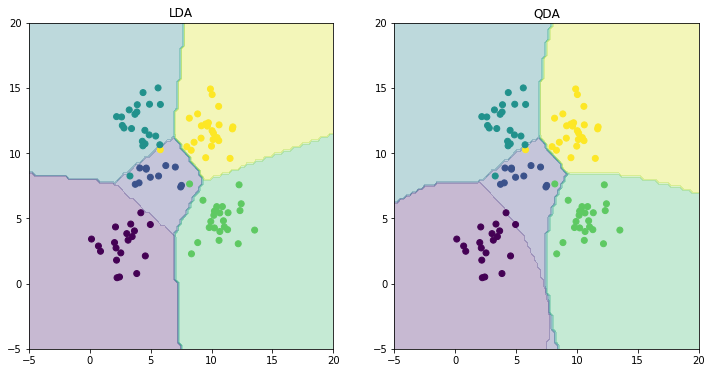

MSE without intercept 106775.3615522326
MSE with intercept 3707.840181476299


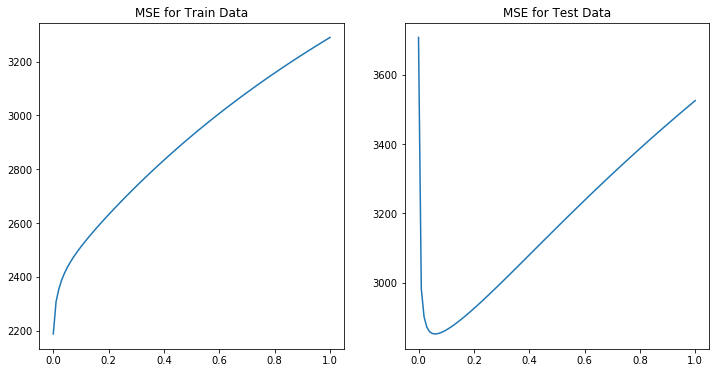

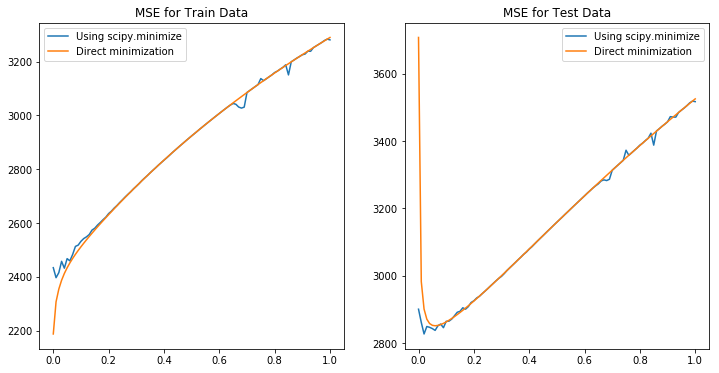

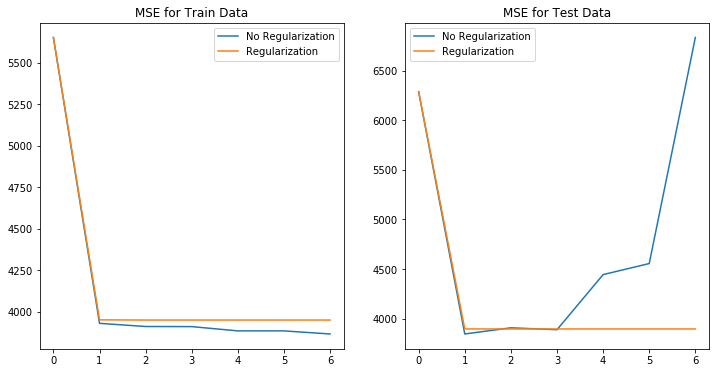

In [104]:
# Main script

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
    
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('QDA')
plt.show()

# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
w_ole= w 
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()
w_ridge=w_l


#print(lambdas,mses3)  for checking lambdas optimal value which will be used in last question
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()





# Problem 5
pmax = 7
# REPLACE THIS WITH lambda_opt estimated from Problem 3 
lambda_opt = 0.06 # the min lambda value is 2851.33021344 which is at 0.06
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
#LDA Accuracy = 0.97
plt.show()

(65, 1)

,w_ole,w_ridge
0,-4.121733e+02,150.194724
1,-3.459403e+02,21.701754
2,5.788141e+02,-39.060152
3,5.892438e+01,189.768796
4,-1.358916e+06,131.436318
5,1.194623e+06,12.871668
6,5.070365e+05,-12.647067
7,-1.345870e+03,-111.677408
8,4.477133e+05,99.438088
9,4.779038e+02,203.314471
